In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

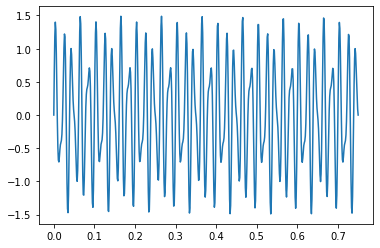

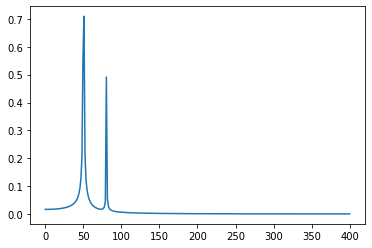

In [21]:
N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.plot(x, y)
plt.show()

yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))

plt.plot(xf, 2.0/N * np.abs(yf[:N//2]))
plt.show()

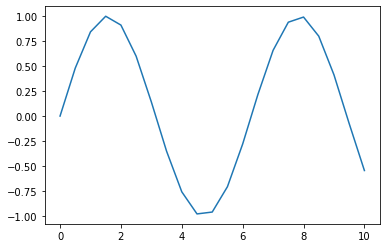

In [15]:
x = np.linspace(0, 10, 21)

plt.plot(x, np.sin(x))

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as tik
import pandas as pd
import numpy as np
import math

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

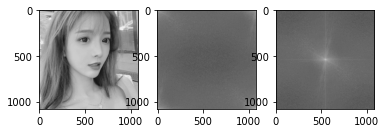

In [20]:
# 第一步读取图片
img = cv2.imread('E:\\code\\ML\\ml-learning\\girl.jpg', 0)

# 第二步：进行float32形式转换
float32_img = np.float32(img)

# 第三步: 使用cv2.dft进行傅里叶变化
dft_img = cv2.dft(float32_img, flags=cv2.DFT_COMPLEX_OUTPUT)
img_dft = np.log(cv2.magnitude(dft_img[:, :, 0], dft_img[:, :, 1]))

# 第四步：使用np.fft.shiftfft()将变化后的图像的低频转移到中心位置
dft_img_ce = np.fft.fftshift(dft_img)

# 第五步：使用cv2.magnitude将实部和虚部转换为实部，乘以20是为了使得结果更大
img_dft_ce = 20 * np.log(cv2.magnitude(dft_img_ce[:, :, 0], dft_img_ce[:, :, 1]))


# 第六步：进行画图操作
plt.subplot(131)
plt.imshow(img, cmap='gray')

plt.subplot(132)
plt.imshow(img_dft, cmap='gray')

plt.subplot(133)
plt.imshow(img_dft_ce, cmap='gray')
plt.show()

1080
1080


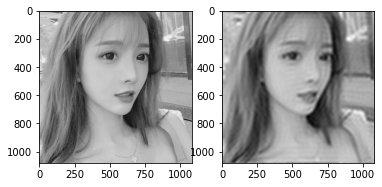

In [22]:
# 第一步读入图片
img = cv2.imread('E:\\code\\ML\\ml-learning\\girl.jpg', 0)

# 第二步：进行数据类型转换
img_float = np.float32(img)

# 第三步：使用cv2.dft进行傅里叶变化
dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)

# 第四步：使用np.fft.fftshift将低频转移到图像中心
dft_center = np.fft.fftshift(dft)

# 第五步：定义掩模：生成的掩模中间为1周围为0
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.zeros((img.shape[0], img.shape[1], 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 1

# 第六步：将掩模与傅里叶变化后图像相乘，保留中间部分
mask_img = dft_center * mask

# 第七步：使用np.fft.ifftshift(将低频移动到原来的位置
img_idf = np.fft.ifftshift(mask_img)

# 第八步：使用cv2.idft进行傅里叶的反变化
img_idf = cv2.idft(img_idf)

# 第九步：使用cv2.magnitude转化为空间域内
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

# 第十步：进行绘图操作
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_idf, cmap='gray')
plt.show()

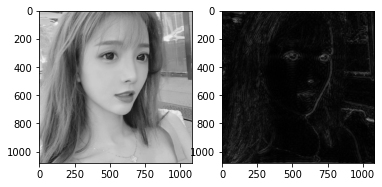

In [11]:
# 只保留高频部分
# 使用掩模只保留低通

# 第一步读入图片
img = cv2.imread('E:\\code\\ML\\ml-learning\\girl.jpg', 0)

# 第二步：进行数据类型转换
img_float = np.float32(img)

# 第三步：使用cv2.dft进行傅里叶变化
dft = cv2.dft(img_float, flags=cv2.DFT_COMPLEX_OUTPUT)

# 第四步：使用np.fft.fftshift将低频转移到图像中心
dft_center = np.fft.fftshift(dft)

# 第五步：定义掩模：生成的掩模中间为0周围为1
crow, ccol = int(img.shape[0] / 2), int(img.shape[1] / 2) # 求得图像的中心点位置
mask = np.ones((img.shape[0], img.shape[1], 2), np.uint8)
mask[crow-30:crow+30, ccol-30:ccol+30] = 0

# 第六步：将掩模与傅里叶变化后图像相乘，保留中间部分
mask_img = dft_center * mask

# 第七步：使用np.fft.ifftshift(将低频移动到原来的位置
img_idf = np.fft.ifftshift(mask_img)

# 第八步：使用cv2.idft进行傅里叶的反变化
img_idf = cv2.idft(img_idf)

# 第九步：使用cv2.magnitude转化为空间域内
img_idf = cv2.magnitude(img_idf[:, :, 0], img_idf[:, :, 1])

# 第十步：进行绘图操作
plt.subplot(121)
plt.imshow(img, cmap='gray')
plt.subplot(122)
plt.imshow(img_idf, cmap='gray')
plt.show()
